# <center><font color = blue>Problem Set 4: Okawville Aquifer Test</font></center>

<ul>
    <li>Assignment Due February 27th</li>
</ul>




In class, we conducted an aquifer test for the Village of Okawville. In this assignment, you will repeat this analysis, but instead of using Jacob Straight Line, you will fit the data from the aquifer test directly to the Theis Solution. 

<ul>
    <li>All values reported should be rounded to three significant figures. There are ways to automate code to do this for you, but you may use the round() function with arguments hard-coded specifically for the output you are displaying.</li>
    <li>All plots should include an appropriate title and labels on the x- and y- axes.</li>
    <li>Observed data (what you import from Excel) should be plotted as points; best fit lines should be plotted as continuous lines.</li>
</ul>

## Part I: Write a code to plot the entire data set

Both the x- and y-axis should be plotted on a linear scale (time on the x-axis, drawdown on the y-axis).

In [0]:
#import needed python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import scipy.special as sps
%matplotlib inline

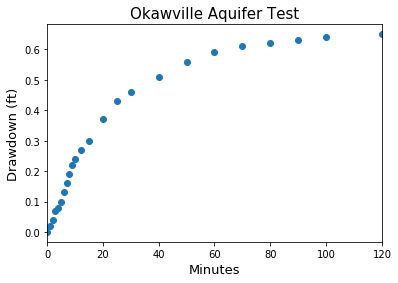

In [0]:
#create a plot of the entire data set on a linear-linear scale
data=pd.read_excel('https://github.com/dbabrams/G572Week4_-AquiferTests/blob/master/Okawville_MW_AquiferTest.xlsx?raw=true',index_col=0)
data.dtw.plot(marker='o',linewidth=0) #drawdown is stored in the 'dtw' column
plt.title('Okawville Aquifer Test',fontsize=15)
plt.xlabel('Minutes',fontsize=13)
plt.ylabel('Drawdown (ft)',fontsize=13)
plt.show()

## Part II: Theis Curve Fitting

The Jacob Straight Line method is based on an approximation of the Theis solution. However, there is another option available when using Python, fitting the Theis solution directly to the data, with S and T as the unknown parameters. 

<b>Include:</b>
<ul>
    <li>A Markdown Cell with the Theis Equation written in LaTeX.</li>
    <li>A plot with the time axis on a logarithmic scale.</li>
    <li>Values for S and T, including appropriate units.</li>
</ul>
    
<b>Tips:</b>    
<ul>
    <li>To get this code to work, you will need to use very small convergence criteria. Don't hesitate to work in the 10^-6-10^-12 range.</li>
    <li>When fitting to the Theis Curve, you may use a subset of data. See the class lecture notes for inspiration on how to do this.</li>
    <li>The answer should be similar to the Jacob Straight Line solution from class (although not exactly the same).</li>
</ul>

<font size = 10>The Theis Equation: $s=\frac{Q}{4\pi T} W(\frac{r^2S}{4Tt})$</font>

In [0]:
#define known parameters of the Theis equation
Qg=5.35 #ft^3/min
rg=30 #ft

In [0]:
#define the Theis optimization equation with time as the independent variable (min), 
#S as Storativity (unitless), T as Transmissivity (ft^2/min), 
#Q as volumetric flow rate (ft^3/min), and r as radius (ft)
def Topt(time,S,T): 
  return Qg/(4*np.pi*T)*sps.exp1(rg**2*S/(4*T*time))

#use a subset of time data to eliminate outliers at far end
subset=data[5:-5]
#print(subset)

#optimize Theis curve fit for parameters (para) S and T
para,cova=spo.curve_fit(Topt,subset.index,subset.dtw,p0=(1*10**-12,1*10**-12))
#print(para)

In [0]:
#define the Theis equation with time as the independent variable (min), 
#S as Storativity (unitless), T as Transmissivity (ft^2/min), 
#Q as volumetric flow rate (ft^3/min), and r as radius (ft)
def Theis(time,S,T,Q,r): 
  return Q/(4*np.pi*T)*sps.exp1(r**2*S/(4*T*time))

In [0]:
#create Theis curve fit line based on optimized parameters S and T
time=data.index.to_series()
fitline=Theis(time,para[0],para[1],Qg,rg)

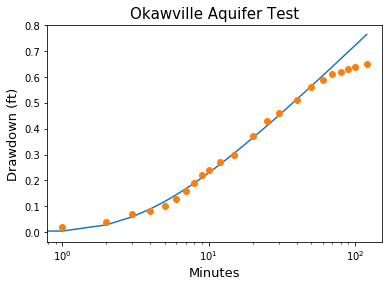

In [0]:
#plot data with Theis curve fit line
plt.semilogx(fitline)
plt.semilogx(data,marker='o',linewidth=0)
plt.title('Okawville Aquifer Test',fontsize=15)
plt.xlabel('Minutes',fontsize=13)
plt.ylabel('Drawdown (ft)',fontsize=13)
plt.show()

In [0]:
#Final answer for part II
Storativity=round(para[0],4)
Transmissivity=int(60*24*round(para[1],0)) #convert ft^2/min to ft^2/day
print('Directly solving the Theis equation indicates that S (storativity, unitless) =',Storativity,'and T (transmissivity) =',Transmissivity,'ft^2/day')

Directly solving the Theis equation indicates that S (storativity, unitless) = 0.0221 and T (transmissivity) = 2880 ft^2/day


## Part III: Contamination Analysis

The village would like to know how long it would take for the contamination to reach a well at the new site pumping at a rate Q of 40.1 $ft^3/min$ (300 gpm). Assuming the initial pre-pumping water table configuration is a flat level surface, the groundwater flow gradient from the brine contamination zone towards the well will be a function of the drawdown created by the well. Calculate the drawdown at 1 ft intervals from the well to the edge of the brine zone (starting at r = 1' and ending at r = 5200').  Approximate the travel time by calculating the linear groundwater velocity (v) for each of the segments. Porosity is 20%.

To calculate the drawdown ($s$ or $\Delta(h_0-h)$) at the given radial distances from the well, use the Theis solution. For time (t) use 180 days (259200 mins), which is the typical length of the groundwater discharge season in Illinois. For this problem, ignore the effects of the different boundary conditions.

<b>Include:</b>
<ul>
    <li>The travel time to 3 significant figures.</li>
    <li>A plot with the primary axis showing drawdown and the secondary axis showing velocity.</li>
</ul>

Click on the following links to find two useful images that you <b>may</b> need for this analysis:

[Well log for supply well 4](https://share.cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/Okawville%20Well%20Log.png?viewer=share)

[High-resolution map of this area showing the contamination plumes](https://cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/BrineContaminationMap.png?viewer=share)

<b>Answer from hand analysis:</b> travel time was ~35 years. Your response should be somewhere between 30-40 years.

In [0]:
#Givens

Q2=40.1 #pumping rate, ft^3/min
t=259200 #time at which to calculate drawdown (ft) at distance r (ft) from well, mins
n=0.2 # porosity, unitless
b=45.5 #estimated from well log: 65.5-20, ft

In [0]:
#Create DataFrame (scry) of values for radial distance from the well (rad) of 1 to 5200 ft

rad=[['rad',[value for value in range(1,5201)]]]
#print(type(rad),rad)
scry=pd.DataFrame.from_dict(dict(rad))
scry['delta_r']=scry.rad-scry.rad.shift() #create column for difference between each radial distance
scry.delta_r=scry.delta_r.fillna(method='bfill')
#print(type(scry),scry)

In [0]:
#Calculate drawdown (s) at each r using t = 259200 mins
#para[0] = S, para[1] = T

scry['drawdown']=Theis(t,para[0],para[1],Q2,scry.rad)

scry['delta_s']=scry.drawdown.shift()-scry.drawdown #create column for difference between each drawdown from one rad to the next
scry.delta_s=scry.delta_s.fillna(method='bfill')

In [0]:
#Calculate linear groundwater velocity (v) at each s in the drawdown column
#start with q (darcy flow), ft/min
scry['q']=para[1]/b*scry.delta_s/scry.delta_r #q=T/b*s/r (Darcy's law for depth averaged transmissivity) 
                                       #where (s = delta_s = change in head between r's) and (r = delta_r = change in horizontal distance)
scry['vcity']=scry.q/n*1440 #linear velocity = q/n, with conversion factor to get units of ft/day
#print(scry)

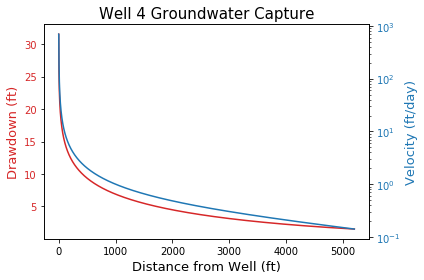

In [0]:
#create plot with drawdown vs distance from well on primary axis & linear velocity vs distance on secondary axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Distance from Well (ft)',fontsize=13)
ax1.set_ylabel('Drawdown (ft)', color=color,fontsize=13)
ax1.plot(scry.rad,scry.drawdown, color=color, )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_yscale("log")
ax2.set_ylabel('Velocity (ft/day)', color=color,fontsize=13)  # we already handled the x-label with ax1
ax2.plot(scry.rad,scry.vcity, color=color,)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Well 4 Groundwater Capture',fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [0]:
#Calculate time contamination would take to travel each 1-ft r interval, given respective velocity, and sum

times=scry.delta_r/scry.vcity # time=length/velocity (days)
cumulative=sum(times.tolist())/365 #convert time (series) to list in order to use sum function, convert sum to years

In [0]:
#Print answer
print('The Theis equation indicates that contamination travel time to the well will likely be around',int(round(cumulative,0)),'years under the given conditions.')

The Theis equation indicates that contamination travel time to the well will likely be around 43 years under the given conditions.


## Part IV: Conclusions

Would you recommend constructing a production well at the new site if the financing for the wells and the pipelines require a 40 year life cycle? Use the above analyses to justify your response. Be sure to comment on any uncertainty in your analysis. Limit this discussion to 1 paragraph.

To completely answer this question would require analysis of how long it would take the contamination concentration at the new well to surpass limits enforced by the EPA or another regulatory agency. The leading edge of the contamination plume is much lower in concentration than the center; so, although the leading edge of the plume is predicted to reach the new well in 43 years, the village almost certainly actually has longer than this before the water would be unusable. However, there is a lot of uncertainty with predicting the future. The model has inherent uncertainty indicated by the covariance. I would recommend looking for a site which would give a longer useful life, but if none is available, constructing a production well at the new site could be feasible even if the financing requires a 40 year life cycle.